# Chapter 6 财政收入影响因素分析及预测

In [22]:
import sys
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVR

In [23]:
inputfile = '../data/chapter6.csv'
data = pd.read_csv(inputfile)

In [24]:
# 描述性统计分析
description = [data.min(), data.max(), data.mean(), data.std()]
description = pd.DataFrame(description, index = ['Min', 'Max', 'Mean', 'STD']).T
print('描述性统计结果：\n',np.round(description, 2))

描述性统计结果：
             Min         Max        Mean         STD
x1   3831732.00  7599295.00  5579519.95  1262194.72
x2       181.54     2110.78      765.04      595.70
x3       448.19     6882.85     2370.83     1919.17
x4      7571.00    42049.14    19644.69    10203.02
x5      6212.70    33156.83    15870.95     8199.77
x6   6370241.00  8323096.00  7350513.60   621341.85
x7       525.71     4454.55     1712.24     1184.71
x8       985.31    15420.14     5705.80     4478.40
x9        60.62      228.46      129.49       50.51
x10       65.66      852.56      340.22      251.58
x11       97.50      120.00      103.30        5.51
x12        1.03        1.91        1.42        0.25
x13     5321.00    41972.00    17273.80    11109.19
y         64.87     2088.14      618.08      609.25


In [25]:
# 相关性分析
corr = data.corr(method = 'pearson')
print('相关系数矩阵为：\n',np.round(corr, 2))

相关系数矩阵为：
        x1    x2    x3    x4    x5    x6    x7    x8    x9   x10   x11   x12  \
x1   1.00  0.95  0.95  0.97  0.97  0.99  0.95  0.97  0.98  0.98 -0.29  0.94   
x2   0.95  1.00  1.00  0.99  0.99  0.92  0.99  0.99  0.98  0.98 -0.13  0.89   
x3   0.95  1.00  1.00  0.99  0.99  0.92  1.00  0.99  0.98  0.99 -0.15  0.89   
x4   0.97  0.99  0.99  1.00  1.00  0.95  0.99  1.00  0.99  1.00 -0.19  0.91   
x5   0.97  0.99  0.99  1.00  1.00  0.95  0.99  1.00  0.99  1.00 -0.18  0.90   
x6   0.99  0.92  0.92  0.95  0.95  1.00  0.93  0.95  0.97  0.96 -0.34  0.95   
x7   0.95  0.99  1.00  0.99  0.99  0.93  1.00  0.99  0.98  0.99 -0.15  0.89   
x8   0.97  0.99  0.99  1.00  1.00  0.95  0.99  1.00  0.99  1.00 -0.15  0.90   
x9   0.98  0.98  0.98  0.99  0.99  0.97  0.98  0.99  1.00  0.99 -0.23  0.91   
x10  0.98  0.98  0.99  1.00  1.00  0.96  0.99  1.00  0.99  1.00 -0.17  0.90   
x11 -0.29 -0.13 -0.15 -0.19 -0.18 -0.34 -0.15 -0.15 -0.23 -0.17  1.00 -0.43   
x12  0.94  0.89  0.89  0.91  0.90  0.95  0

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28909 (\N{CJK UNIFIED IDEOGRAPH-70ED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: Us

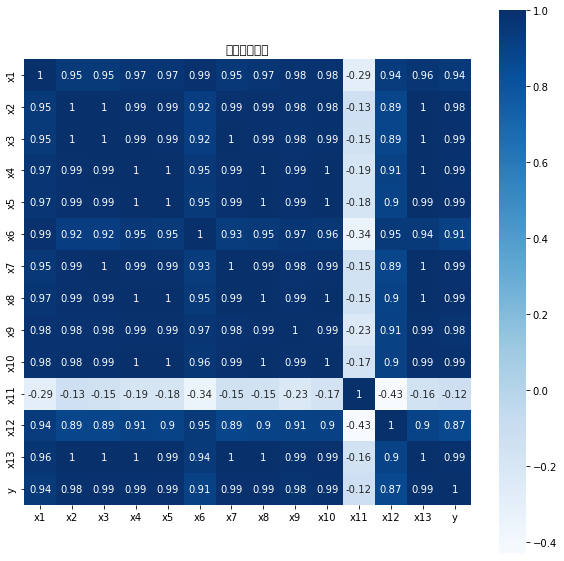

<function matplotlib.pyplot.close(fig=None)>

In [26]:
# 绘制热力图
plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, vmax=1, square=True, cmap="Blues")
plt.title('相关性热力图')
plt.show()
plt.close

In [27]:
lasso = Lasso(10000)  # 调用Lasso()函数，设置λ的值为1000
lasso.fit(data.iloc[:,0:13],data['y'])
print('相关系数为：',np.round(lasso.coef_,5))  # 输出结果，保留五位小数

相关系数为： [-3.000e-05 -0.000e+00  0.000e+00  1.577e-02  5.567e-02 -2.000e-04
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  1.317e-02]


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.937e+04, tolerance: 7.053e+02
  model = cd_fast.enet_coordinate_descent(


In [28]:
print('相关系数非零个数为：',np.sum(lasso.coef_ != 0))  # 计算相关系数非零的个数

相关系数非零个数为： 5


In [29]:
mask = lasso.coef_ != 0  # 返回一个相关系数是否为零的布尔数组
print('相关系数是否为零：',mask)

相关系数是否为零： [ True False False  True  True  True False False False False False False
  True]


In [30]:
outputfile ='../data/new_chapter6.csv'  # 输出的数据文件
new_reg_data = data.iloc[:, [i for i in range(len(mask)) if mask[i]==True]]  # 返回相关系数非零的数据
new_reg_data.to_csv(outputfile)  # 存储数据
print('输出数据的维度为：',new_reg_data.shape)  # 查看输出数据的维度

输出数据的维度为： (20, 5)


In [31]:
def GM11(x0): #自定义灰色预测函数
  x1 = x0.cumsum() #1-AGO序列
  z1 = (x1[:len(x1)-1] + x1[1:])/2.0 #紧邻均值（MEAN）生成序列
  z1 = z1.reshape((len(z1),1))
  B = np.append(-z1, np.ones_like(z1), axis = 1)
  Yn = x0[1:].reshape((len(x0)-1, 1))
  [[a],[b]] = np.dot(np.dot(np.linalg.inv(np.dot(B.T, B)), B.T), Yn) #计算参数
  f = lambda k: (x0[0]-b/a)*np.exp(-a*(k-1))-(x0[0]-b/a)*np.exp(-a*(k-2)) #还原值
  delta = np.abs(x0 - np.array([f(i) for i in range(1,len(x0)+1)]))
  C = delta.std()/x0.std()
  P = 1.0*(np.abs(delta - delta.mean()) < 0.6745*x0.std()).sum()/len(x0)
  return f, a, b, x0[0], C, P #返回灰色预测函数、a、b、首项、方差比、小残差概率

In [34]:
new_reg_data.index = range(1994, 2014)
new_reg_data.loc[2014] = None
new_reg_data.loc[2015] = None

ValueError: Length mismatch: Expected axis has 22 elements, new values have 20 elements

In [35]:
new_reg_data

,x1,x4,x5,x6,x13
1994,3831732.00,7571.00,6212.70,6370241.0,5321.0
1995,3913824.00,9038.16,7601.73,6467115.0,6529.0
1996,3928907.00,9905.31,8092.82,6560508.0,7008.0
1997,4282130.00,10444.60,8767.98,6664862.0,7694.0
1998,4453911.00,11255.70,9422.33,6741400.0,8027.0
1999,4548852.00,12018.52,9751.44,6850024.0,8549.0
2000,4962579.00,13966.53,11349.47,7006896.0,9566.0
2001,5029338.00,14694.00,11467.35,7125979.0,10473.0
2002,5070216.00,13380.47,10671.78,7206229.0,11469.0
2003,5210706.00,15002.59,11570.58,7251888.0,12360.0


In [37]:
l = ['x1', 'x4', 'x5', 'x6', 'x13']
for i in l:
  f = GM11(new_reg_data.loc[range(1994, 2014),i].values)[0]
  new_reg_data.loc[2014,i] = f(len(new_reg_data)-1)  # 2014年预测结果
  new_reg_data.loc[2015,i] = f(len(new_reg_data))  # 2015年预测结果
  new_reg_data[i] = new_reg_data[i].round(2)  # 保留两位小数
outputfile = '../data/chapter6_GM11.csv'  # 灰色预测后保存的路径
y = list(data['y'].values)  # 提取财政收入列，合并至新数据框中
y.extend([np.nan,np.nan])
new_reg_data['y'] = y
new_reg_data.to_csv(outputfile)  # 结果输出
print('预测结果为：\n',new_reg_data.loc[2014:2015,:])  # 预测结果展示

预测结果为：
               x1        x4        x5          x6       x13   y
2014  8142148.24  43611.84  35046.63  8505522.58  44506.47 NaN
2015  8460489.28  47792.22  38384.22  8627139.31  49945.88 NaN


/var/folders/bm/p1mqyz457mdgdtmf_f3vhx6m0000gn/T/ipykernel_3372/2086459178.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_reg_data[i] = new_reg_data[i].round(2)  # 保留两位小数
/var/folders/bm/p1mqyz457mdgdtmf_f3vhx6m0000gn/T/ipykernel_3372/2086459178.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_reg_data[i] = new_reg_data[i].round(2)  # 保留两位小数
/var/folders/bm/p1mqyz457mdgdtmf_f3vhx6m0000gn/T/ipykernel_3372/2086459178.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

真实值与预测值分别为：
             y       y_pred
1994    64.87   -39.064060
1995    99.75    51.572239
1996    88.11    88.110000
1997   106.07   109.369624
1998   137.32   140.381345
1999   188.14   164.715895
2000   219.91   246.677504
2001   271.91   271.669785
2002   269.10   228.155086
2003   300.55   300.540126
2004   338.45   409.692767
2005   408.86   502.306859
2006   476.72   577.821152
2007   838.99   773.052490
2008   843.14   915.783304
2009  1107.67  1051.968337
2010  1399.16  1274.673831
2011  1535.14  1535.127938
2012  1579.68  1755.216656
2013  2088.14  2000.772565
2014      NaN  2106.229924
2015      NaN  2392.945802


/var/folders/bm/p1mqyz457mdgdtmf_f3vhx6m0000gn/T/ipykernel_3372/1976966333.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_reg_data['y_pred'] = linearsvr.predict(x) * data_std['y'] + data_mean['y']


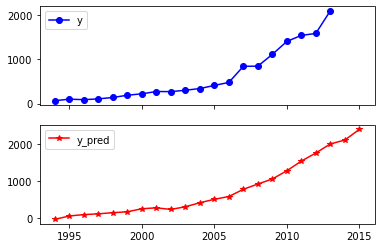

In [39]:
feature = ['x1', 'x4', 'x5', 'x6', 'x13']  # 属性所在列
data_train = new_reg_data.loc[range(1994,2014)].copy()  # 取2014年前的数据建模
data_mean = data_train.mean()
data_std = data_train.std()
data_train = (data_train - data_mean)/data_std  # 数据标准化
x_train = data_train[feature].values  # 属性数据
y_train = data_train['y'].values  # 标签数据

linearsvr = LinearSVR()  # 调用LinearSVR()函数
linearsvr.fit(x_train,y_train)
x = ((new_reg_data[feature] - data_mean[feature])/data_std[feature]).values  # 预测，并还原结果。
new_reg_data['y_pred'] = linearsvr.predict(x) * data_std['y'] + data_mean['y']
outputfile = '../data/new_reg_data_GM11_revenue.csv'  # SVR预测后保存的结果
data.to_csv(outputfile)

print('真实值与预测值分别为：\n',new_reg_data[['y','y_pred']])

fig = new_reg_data[['y','y_pred']].plot(subplots = True, style=['b-o','r-*'])  # 画出预测结果图
plt.show()